### Problem 1

In [213]:
A = [[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12]]

B = [[-1,0,1,2],
     [3,4,5,6],
     [-7,-8,-9,-10]]

C = [[0 for col in range(len(A[0]))] for row in range(len(A))]

for i in range(len(A)):
    for j in range(len(A[0])):
        C[i][j] = A[i][j]+B[i][j]
        
        

print(C)

[[0, 2, 4, 6], [8, 10, 12, 14], [2, 2, 2, 2]]


### Problem 2

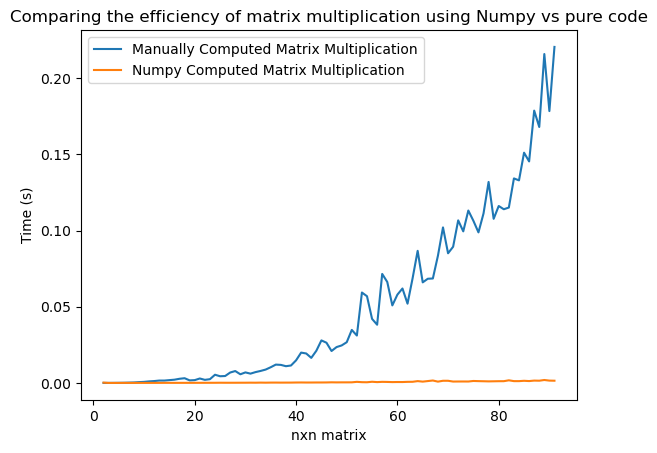

In [5]:
import time ### This is for seed generation to obtain random arrays
from datetime import datetime

def LCG(seed,n):
    x = seed
    x = (1*x +1) % 2**32 
 
    return x

def random_matrix(n,seed):
    matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            seed += 10
            num = LCG(seed,j)
            row.append(num*10)
        matrix.append(row)

    return matrix

n = 90



time_manual = []
for h in range(2,n+2):
    seed = int(datetime.now().timestamp())
    A = random_matrix(h,seed)
    B = random_matrix(h,seed+1)
    C = [[0 for col in range(len(A[0]))] for row in range(len(A))]
    start = time.time()
    for i in range(h):
        for j in range(h):
            for k in range(h):
                C[i][j] += (A[i][k]*B[k][j])

        
    end = time.time()
    time_manual.append(end-start)
    
            
import numpy as np

time_numpy = []
for l in range(2,n+2):
    seed = int(datetime.now().timestamp())
    A = random_matrix(l,seed)
    B = random_matrix(l,seed+1)
    start = time.time()
    np.matmul(A,B)
    end = time.time()
    time_numpy.append(end-start)

import matplotlib.pyplot as plt
x_axis = np.arange(2,n+2)

plt.plot(x_axis,time_manual,label = 'Manually Computed Matrix Multiplication' )
plt.plot(x_axis,time_numpy, label = 'Numpy Computed Matrix Multiplication')
plt.title("Comparing the efficiency of matrix multiplication using Numpy vs pure code")
plt.xlabel("nxn matrix")
plt.ylabel("Time (s)")
plt.legend()


##### The obvious interpretation of the results is that numpy is far more efficient. Matrices of up to only size 80x80 were tested, due to the exponential computational time for the manual multiplication. For typical machine learning algorithms, where matrix multiplication is very common, the matrices are far greater, and one can intuitively exprapolate that a single matrix multiplication of a 1000x1000 matrix would take far too long. Given that hundreds of matrix operations are needed for complex algorithms, this example demonstrates the ultility and need for efficient libraries, such as numpy.

### Problem 3

In [2]:
import numpy as np
import numpy.linalg as linalg

def SVD(A):
    A = np.array(A)
    S = np.matmul(np.transpose(A),A)
    
    D,V= np.linalg.eig(S) ### D=eigenvalues, V=eigenvectors 


    ### Sort eigenvalues according to their magnitude 
    idx = D.argsort()[::-1]   
    D = D[idx]
    V = V[:,idx]

    ### Convert eigenvalues into singular values
    D = np.sqrt(D)
    
    ### Diagonalize matrix of singular values
    sigma = [[0 for col in range(len(A[0]))] for row in range(len(A))] ### Allows any nxm matrix to be analyzed 
    sigma = np.array(sigma,dtype = float)
    np.fill_diagonal(sigma,D)
    

    #### Compute U 
    X = np.matmul(A, A.T)
    eigenvalues, U = np.linalg.eig(X)

    

    return U,sigma,V